# Arima / Sarimax

In [235]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta 
import plotly.graph_objects as go 
import plotly.express as px
import nbformat as nb
import pmdarima

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [236]:
# define the dates to fetch data

today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("The data will be b/w these dates: ",start_date, end_date)

The data will be b/w these dates:  2023-08-28 2024-08-27


In [237]:
#define the ticker

ticker = 'BAJFINANCE.NS'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-28,7224.950195,7261.000000,7138.100098,7235.600098,7199.458008,703626
2023-08-29,7250.000000,7310.950195,7236.000000,7293.350098,7256.919434,1418305
2023-08-30,7326.000000,7330.899902,7258.000000,7268.100098,7231.795410,460268
2023-08-31,7280.000000,7285.000000,7135.000000,7163.000000,7127.220703,1412980
2023-09-01,7168.549805,7329.399902,7155.000000,7320.600098,7284.033203,676076


In [238]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2023-08-28 to 2024-08-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       243 non-null    float64
 1   High       243 non-null    float64
 2   Low        243 non-null    float64
 3   Close      243 non-null    float64
 4   Adj Close  243 non-null    float64
 5   Volume     243 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 KB


In [239]:
df.insert(0, "Date", df.index, True)


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2023-08-28 to 2024-08-26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       243 non-null    datetime64[ns]
 1   Open       243 non-null    float64       
 2   High       243 non-null    float64       
 3   Low        243 non-null    float64       
 4   Close      243 non-null    float64       
 5   Adj Close  243 non-null    float64       
 6   Volume     243 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.2 KB


In [241]:
df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       243 non-null    datetime64[ns]
 1   Open       243 non-null    float64       
 2   High       243 non-null    float64       
 3   Low        243 non-null    float64       
 4   Close      243 non-null    float64       
 5   Adj Close  243 non-null    float64       
 6   Volume     243 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.4 KB


In [243]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-28,7224.950195,7261.000000,7138.100098,7235.600098,7199.458008,703626
1,2023-08-29,7250.000000,7310.950195,7236.000000,7293.350098,7256.919434,1418305
2,2023-08-30,7326.000000,7330.899902,7258.000000,7268.100098,7231.795410,460268
3,2023-08-31,7280.000000,7285.000000,7135.000000,7163.000000,7127.220703,1412980
4,2023-09-01,7168.549805,7329.399902,7155.000000,7320.600098,7284.033203,676076


In [244]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,243,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02
mean,2024-02-25 04:56:17.777777664,7129.161113,7191.316694,7048.502662,7116.106783,7086.914058,1.156826e+06
min,2023-08-28 00:00:00,6332.500000,6345.899902,6187.799805,6311.250000,6279.725098,3.314890e+05
25%,2023-11-26 00:00:00,6757.274902,6813.699951,6693.250000,6743.449951,6727.114502,7.236280e+05
50%,2024-02-23 00:00:00,7135.000000,7226.950195,7065.500000,7130.100098,7110.000000,9.509650e+05
75%,2024-05-28 12:00:00,7390.274902,7449.975098,7310.274902,7387.250000,7350.350342,1.276122e+06
max,2024-08-26 00:00:00,8139.799805,8192.000000,8095.450195,8168.549805,8127.747559,6.818601e+06
std,NaN,412.498159,414.294341,412.346230,414.688360,409.115018,7.738028e+05


In [245]:
# make a plot on plotly

fig = px.line(df, x='Date', y=df.columns, title='Data')
fig.show()

In [246]:
# select columns

df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-08-28,7235.600098
1,2023-08-29,7293.350098
2,2023-08-30,7268.100098
3,2023-08-31,7163.000000
4,2023-09-01,7320.600098


In [247]:
# plot the data to see how it looks using plotly

fig = px.line(df, x='Date', y='Close', title='RELIANCE Stock Price')
fig.show()

In [248]:
# stationarity check on data

from statsmodels.tsa.stattools import adfuller
def adf_test(df) :
    result = adfuller(df)
    print('ADF Statistic: %f' % result [0])
    print('p-value %f' % result [1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])


ADF Statistic: -1.793641
p-value 0.383623
Fail to reject the null hypothesis. Data is not stationary


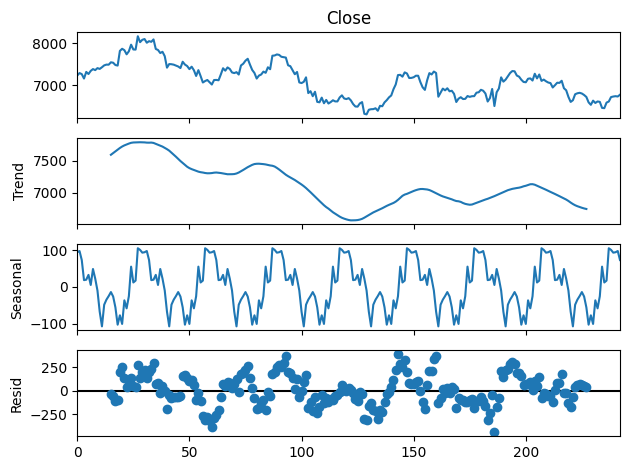

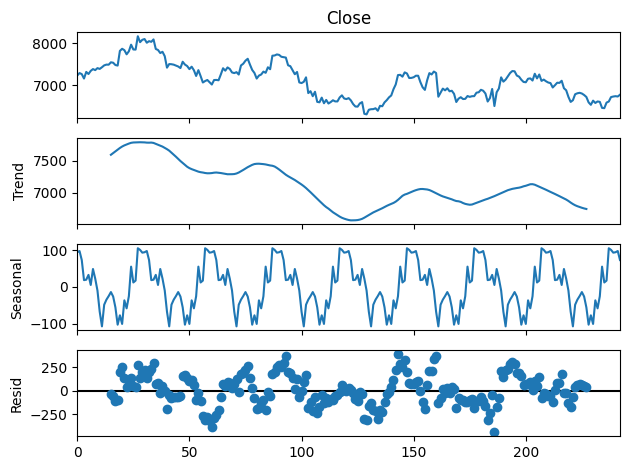

In [249]:
# decompose the data to see the trend, seasonality and noise

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='addictive', period=30)
decompose.plot()

# For d value

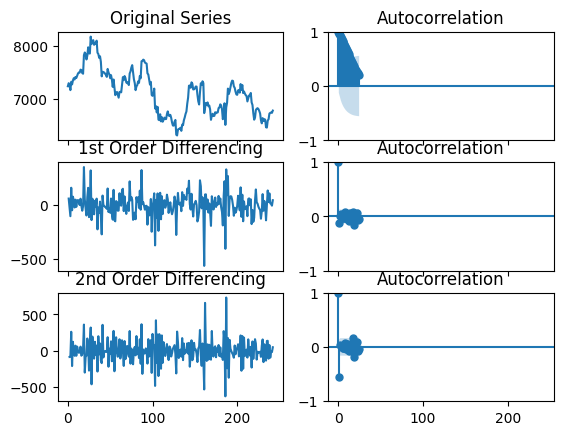

In [250]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2,1])

plt.show()

d = 1

# For p value

           0
0   1.000000
1   0.962564
2   0.933217
3   0.903603
4   0.871529
5   0.836749
6   0.802949
7   0.770619
8   0.735190
9   0.693613
10  0.654387
11  0.618991
12  0.583188
13  0.553103
14  0.519941
15  0.482315
16  0.444927
17  0.411567
18  0.372959
19  0.345840
20  0.318159
21  0.293266
22  0.266558
23  0.235362


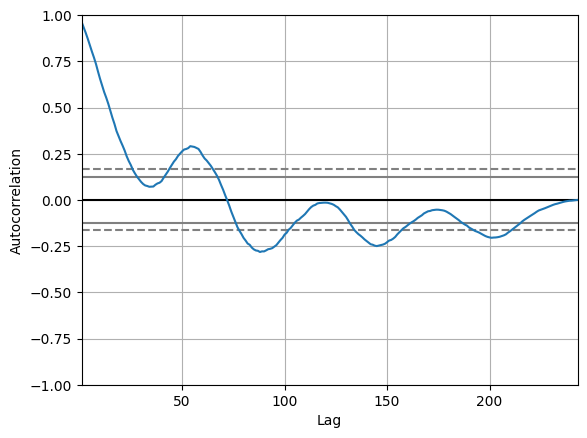

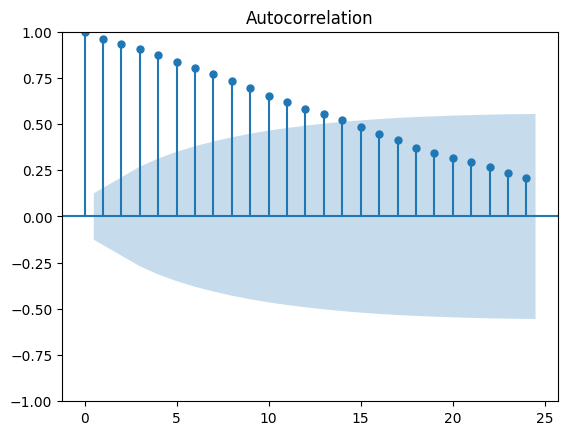

In [251]:
# plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])

plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

p = 2

# For q value

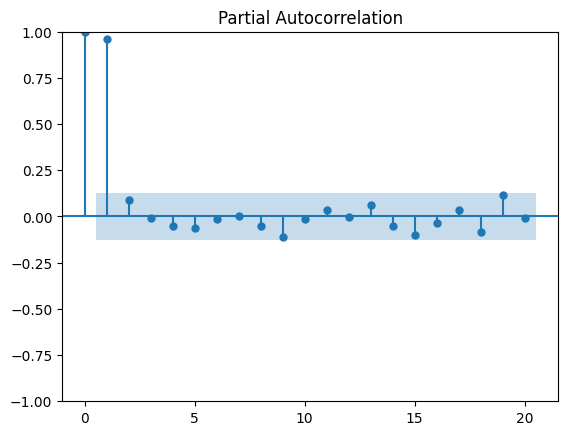

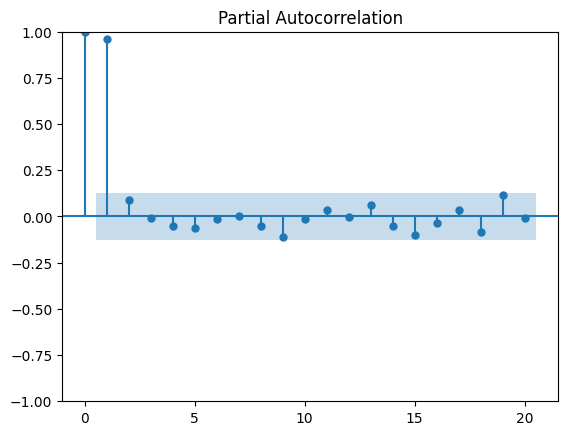

In [252]:
# partial autocorrelation

from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

p = 2 
d = 1
q = 2

In [253]:
# lets run arima with pmdarima

from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace =True, error_action='ignore', suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3005.265, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2935.865, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3003.787, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2919.613, Time=0.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2920.920, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2921.595, Time=0.67 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=3.37 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=2919.644, Time=0.46 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=2923.509, Time=1.27 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=2921.451, Time=1.78 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]       

In [254]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1455.806
Date:                            Tue, 27 Aug 2024   AIC                           2919.613
Time:                                    14:15:23   BIC                           2933.365
Sample:                                         0   HQIC                          2925.160
                                            - 243                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1188      0.059     -1.998      0.046      -0.235      -0.002
ar.S.L12      -0.6609      0.060   

In [255]:
# stats model and SARIMA

import statsmodels.api as sm
import warnings

p, d, q =2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'],
                                 order=(p,d,q),
                                 seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  243
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1432.300
Date:                            Tue, 27 Aug 2024   AIC                           2882.599
Time:                                    14:15:27   BIC                           2913.542
Sample:                                         0   HQIC                          2895.081
                                            - 243                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0010     62.364   1.55e-05      1.000    -122.231     122.233
ar.L2          0.9990     70.693   

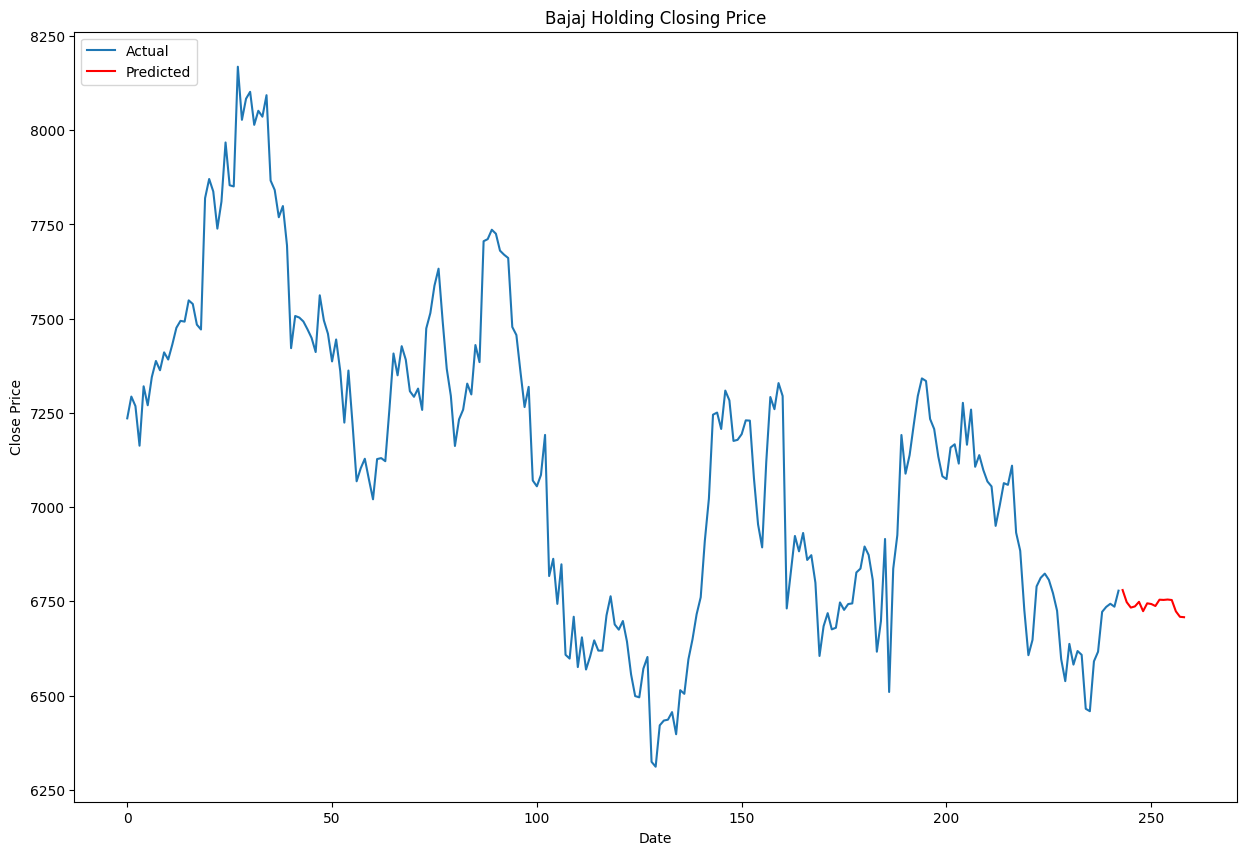

In [259]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+15)

plt.figure(figsize=(15, 10))
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bajaj Holding Closing Price')

plt.legend(loc='upper left')
plt.show()